In [18]:
import pickle
import pandas as pd
from sklearn.pipeline import Pipeline 
import matplotlib.pyplot as plt

In [12]:
dbfile = open('pipeline.pk1', 'rb')
Pipeline = pickle.load(dbfile)

In [13]:
df = pd.read_csv("titanic_2 (1).csv")

In [14]:
print(df)

     pclass     sex  age embarked
0         2    male   81        S
1         2    male   76        C
2         3    male   39        C
3         3  female   26        S
4         3    male    3        S
..      ...     ...  ...      ...
995       2  female   79        Q
996       2  female   59        Q
997       2    male   84        Q
998       3  female   28        S
999       3    male   72        Q

[1000 rows x 4 columns]


In [16]:
pred = Pipeline.predict(df)

In [17]:
print(pred)

[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 

In [21]:
df['predicted'] = pred

In [22]:
print(df)

     pclass     sex  age embarked  predicted
0         2    male   81        S          0
1         2    male   76        C          0
2         3    male   39        C          0
3         3  female   26        S          1
4         3    male    3        S          0
..      ...     ...  ...      ...        ...
995       2  female   79        Q          0
996       2  female   59        Q          1
997       2    male   84        Q          0
998       3  female   28        S          1
999       3    male   72        Q          0

[1000 rows x 5 columns]


In [53]:
df1 = df.groupby(['predicted', 'pclass'])['sex']

In [55]:
surv_first = df1.get_group((1, 1)).count()
surv_second = df1.get_group((1, 2)).count()
surv_third = df1.get_group((1, 3)).count()
dead_first = df1.get_group((0, 1)).count()
dead_second = df1.get_group((0, 2)).count()
dead_third = df1.get_group((0, 3)).count()

<BarContainer object of 6 artists>

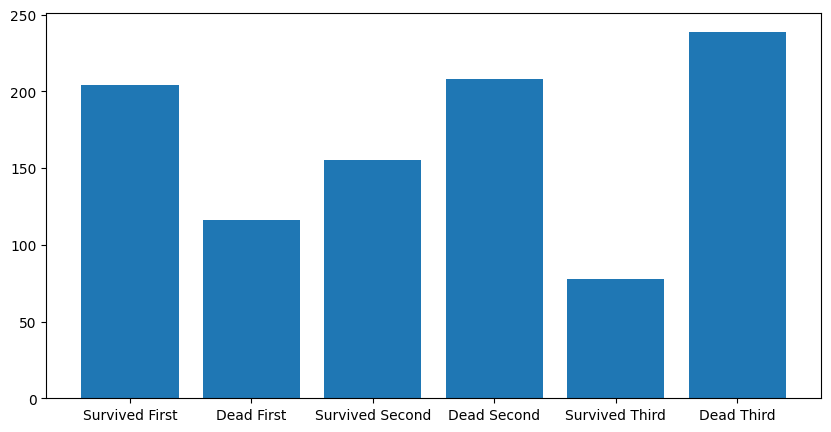

In [57]:
fig = plt.figure(figsize = (10, 5))
x = ['Survived First', 'Dead First', 'Survived Second', 'Dead Second', 'Survived Third', 'Dead Third']
y = [surv_first, dead_first, surv_second, dead_second, surv_third, dead_third]
plt.bar(x,y)

<BarContainer object of 4 artists>

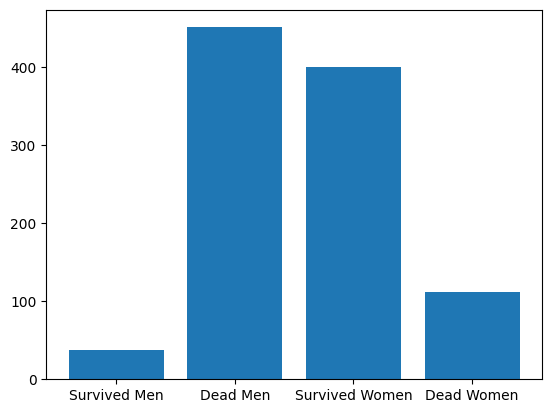

In [58]:
df2 = df.groupby(['predicted', 'sex'])['pclass']
surv_men = df2.get_group((1, 'male')).count()
surv_women = df2.get_group((1, 'female')).count()
dead_men = df2.get_group((0, 'male')).count()
dead_women = df2.get_group((0, 'female')).count()

x1 = ['Survived Men', 'Dead Men', 'Survived Women', 'Dead Women']
y1 = [surv_men, dead_men, surv_women, dead_women]

plt.bar(x1, y1)